In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import collections
import re

%matplotlib inline

In [68]:
df_1 = pd.read_csv('lingSpam.csv', usecols=["Body", "Label"])
df_2 = pd.read_csv('enronSpamSubset.csv', usecols=["Body", "Label"])
df_3 = pd.read_csv('completeSpamAssassin.csv', usecols=["Body", "Label"])

df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df.dropna()
df.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [69]:
# get rid of "Subject: " in front of every email 
df["Body"] = [text[9:].lower() for text in df["Body"]]
df.head()

,Body,Label
0,great part-time or summer job !\n \n * * * * *...,1
1,auto insurance rates too high ?\n \n dear nlpe...,1
2,do want the best and economical hunting vacati...,1
3,email 57 million people for $ 99\n \n 57 milli...,1
4,do n't miss these !\n \n attention ! warning !...,1


In [70]:
# label 0 = not spam, 1 = spam 
label = ["Not Spam", "Spam"]
label_counts = df["Label"].value_counts()

In [71]:
print("There are {} observations and {} features in this dataset".format( len(df), len(df.columns)))
print("There are {} non spam emails and {} spam emails".format(label_counts[0], label_counts[1]))

There are 18650 observations and 2 features in this dataset
There are 11322 non spam emails and 7328 spam emails


<BarContainer object of 2 artists>

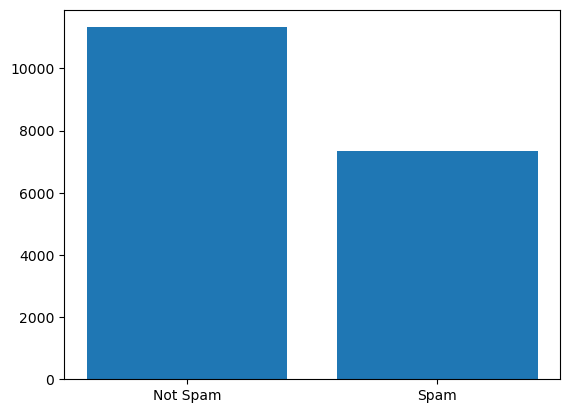

In [72]:
# label count frequency visualization
plt.bar(label, label_counts)

In [73]:
spam_df = df[df["Label"] == 1]
not_spam_df = df[df["Label"] == 0]

In [74]:
spam_text = ' '.join(spam_df["Body"].tolist())
not_spam_text = ' '.join(not_spam_df["Body"].tolist())

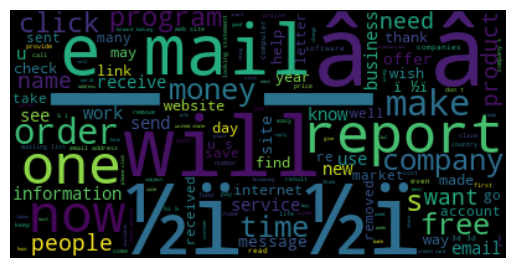

In [75]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(spam_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

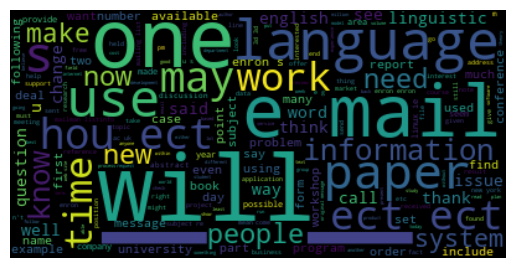

In [76]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(not_spam_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:
spam_text_words = re.sub(r'[^\w]', ' ', spam_text)
spam_text_counter = collections.Counter(spam_text_words.split(" "))

not_spam_text_words = re.sub(r'[^\w]', ' ', not_spam_text)
not_spam_text_counter = collections.Counter(not_spam_text_words.split(" "))

spam_text_list = sorted(list(spam_text_counter.items()), key=lambda x:x[1], reverse=True)[2:51]
not_spam_text_list = sorted(list(not_spam_text_counter.items()), key=lambda x:x[1], reverse=True)[2:51]


In [78]:
spam_keys = [x[0] for x in spam_text_list]
spam_values = [x[1] for x in spam_text_list]

not_keys = [x[0] for x in not_spam_text_list]
not_values = [x[1] for x in not_spam_text_list]

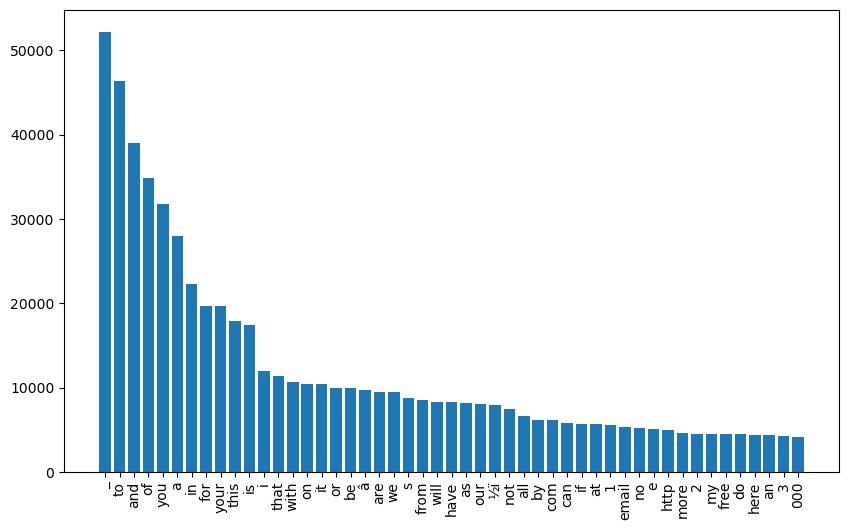

In [79]:
plt.figure(figsize=(10,6))
plt.bar(spam_keys, spam_values)
plt.xticks(rotation=90)
plt.show()

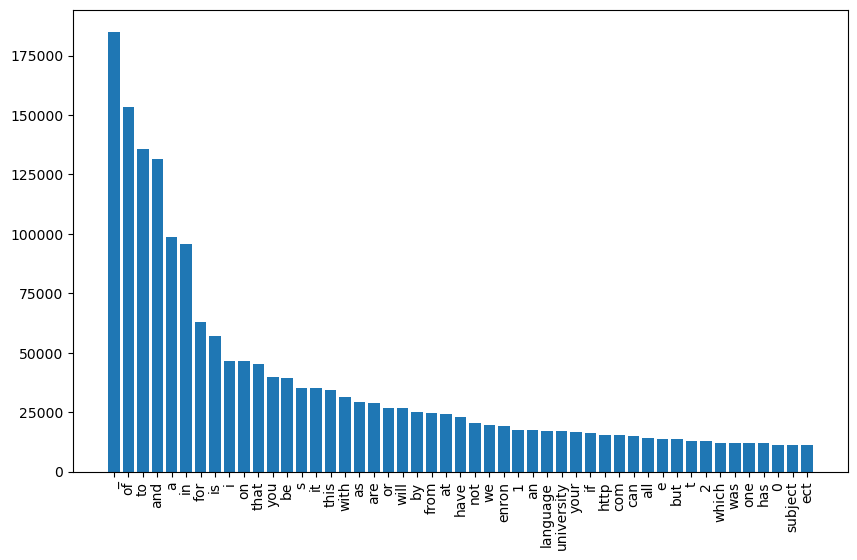

In [80]:
plt.figure(figsize=(10,6))
plt.bar(not_keys, not_values)
plt.xticks(rotation=90)
plt.show()